### 0. Import libraries ### 

In [1]:
import os
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt 
import rasterio as rio
# import geospatial_functions.geospatial_analysis as ga
import geospatial_functions.geospatial_plot as gp

print('Done')

Done


### 0. Specify file paths ### 

In [2]:
case = 'shoshone'
# case = 'tuolumne'

# --- common source file paths ---
# root_dir = '/glade/u/home/hongli/scratch/2020_06_02HRUcomplexity/discretize'
root_dir='/Users/hongli/Documents/proj/2020_06_01HRUcomplexity/discretize'

# merit_shp = '/glade/u/home/hongli/data/shapefile/riv_pfaf_7_MERIT_westUS/riv_pfaf_7_MERIT_Hydro_v07_Basins_v01_wUS.shp'
merit_shp = os.path.join(root_dir, 'source_data/riv_pfaf_7_MERIT_westUS/riv_pfaf_7_MERIT_Hydro_v07_Basins_v01_wUS.shp')
merit_shp_prj_dir = os.path.join(root_dir, 'source_data/riv_pfaf_7_MERIT_westUS_prj')
if not os.path.exists(merit_shp_prj_dir):
    os.makedirs(merit_shp_prj_dir)
merit_shp_prj = os.path.join(merit_shp_prj_dir, 'riv_pfaf_7_MERIT_Hydro_v07_Basins_v01_wUS_prj.shp')

# --- case study dependent files --- 
case_dir = os.path.join(root_dir,case)
sub_shp_prj = os.path.join(case_dir, 'subbasin_prj.shp')
lc_crop = os.path.join(case_dir, 'landcover_crop.tif')
lc_class_raster = os.path.join(case_dir, 'landcover_class.tif')

# --- plot configurations ---
wgs_crs = 'epsg:4326'
title = case.capitalize()
                           
print('Done')

Done


### 1. Plot land cover ###

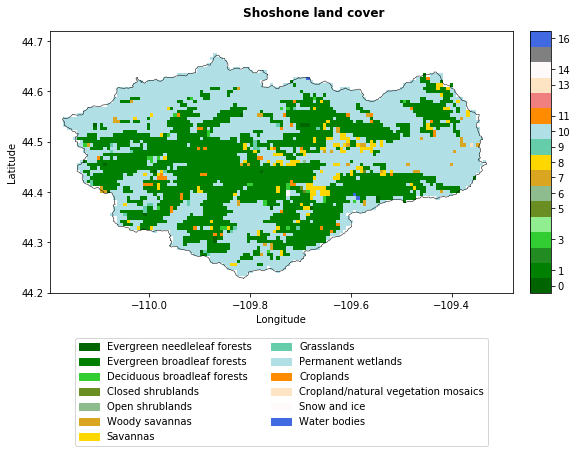

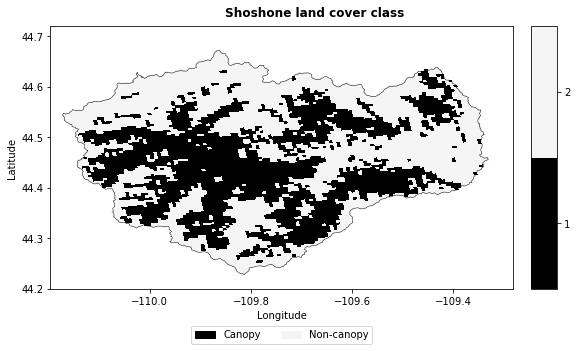

Done


In [3]:
# 1. plot raw land cover
# define legend dictionary. dist[raster_value]=list(color,label)
# class color reference: http://www.shadedrelief.com/shelton/c.html
legend_dict={0:["darkgreen", "Evergreen needleleaf forests"],
             1:["green", "Evergreen broadleaf forests"],
             2:["forestgreen", 'Deciduous needleleaf forests'],
             3:["limegreen", 'Deciduous broadleaf forests'], 
             4:["lightgreen", 'Mixed forests'], 
             5:["olivedrab", 'Closed shrublands'], 
             6:["darkseagreen", 'Open shrublands'], 
             7:["goldenrod", 'Woody savannas'], 
             8:["gold", 'Savannas'], 
             9:["mediumaquamarine", 'Grasslands'], 
             10:["powderblue", 'Permanent wetlands'], 
             11:["darkorange", 'Croplands'], 
             12:["lightcoral", 'Urban and built-up lands'], 
             13:["bisque", 'Cropland/natural vegetation mosaics'], 
             14:["snow", 'Snow and ice'], 
             15:["grey", 'Barren'], 
             16:["royalblue", 'Water bodies']} 

label_dict = {0:"Evergreen needleleaf forests",
             1:"Evergreen broadleaf forests",
             2:'Deciduous needleleaf forests',
             3:'Deciduous broadleaf forests', 
             4:'Mixed forests', 
             5:'Closed shrublands', 
             6:'Open shrublands', 
             7:'Woody savannas', 
             8:'Savannas', 
             9:'Grasslands', 
             10:'Permanent wetlands', 
             11:'Croplands', 
             12:'Urban and built-up lands', 
             13:'Cropland/natural vegetation mosaics', 
             14:'Snow and ice', 
             15:'Barren', 
             16:'Water bodies'}

figsize=(9,9*0.65) # width, height in inches
title = case.capitalize()+' land cover'
leg_ncol=2
leg_loc='upper center'
leg_bbox_to_anchor=(0.5,-0.15)
ofile = os.path.join(case_dir, 'plot', 'landcover.png')   

# inraster,bound_vector,wgs_crs,cmap_str,input_dict,figsize,title,leg_loc,leg_bbox_to_anchor,leg_ncol,ofile=\
# lc_crop,sub_shp_prj,wgs_crs,'jet',label_dict,figsize,title,leg_loc,leg_bbox_to_anchor,leg_ncol,ofile
inraster,bound_vector,wgs_crs,cmap_str,input_dict,figsize,title,leg_loc,leg_bbox_to_anchor,leg_ncol,ofile=\
lc_crop,sub_shp_prj,wgs_crs,'user',legend_dict,figsize,title,leg_loc,leg_bbox_to_anchor,leg_ncol,ofile

gp.plot_discrete_raster(inraster,bound_vector,wgs_crs,cmap_str,input_dict,
                        figsize,title,leg_loc,leg_bbox_to_anchor,leg_ncol,ofile)


# 2. plot land cover class
legend_dict={1:["black", "Canopy"],
             2:["whitesmoke", "Non-canopy"]} 
figsize=(9,9*0.5)
title = case.capitalize()+' land cover class'
leg_ncol=2
leg_loc='upper center'
leg_bbox_to_anchor=(0.5,-0.12)
ofile = os.path.join(case_dir, 'plot', 'landcover_class.png')   

inraster,bound_vector,wgs_crs,cmap_str,input_dict,figsize,title,leg_loc,leg_bbox_to_anchor,leg_ncol,ofile=\
lc_class_raster,sub_shp_prj,wgs_crs,'user',legend_dict,figsize,title,leg_loc,leg_bbox_to_anchor,leg_ncol,ofile

gp.plot_discrete_raster(inraster,bound_vector,wgs_crs,cmap_str,input_dict,
                        figsize,title,leg_loc,leg_bbox_to_anchor,leg_ncol,ofile)

print('Done')
